In [11]:
# import libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# load data

In [14]:
titanic_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [15]:
len(titanic_data)

891

In [16]:
# overview of data

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [20]:
titanic_data.shape

(891, 12)

In [21]:
test.shape

(418, 11)

In [22]:
sample_submission.shape

(418, 2)

In [23]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

---
### Data Description
---
- Survived: 0 -> not survived, 1 -> survived
- Pclass: 1 -> 1st(Upper), 2 -> 2nd(Middle), 3 -> 3rd(Lower)
- Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked:	Port of Embarkation;	C -> Cherbourg, Q -> Queenstown, S -> Southampton

---
### Data visualization & Feature Analysis
---

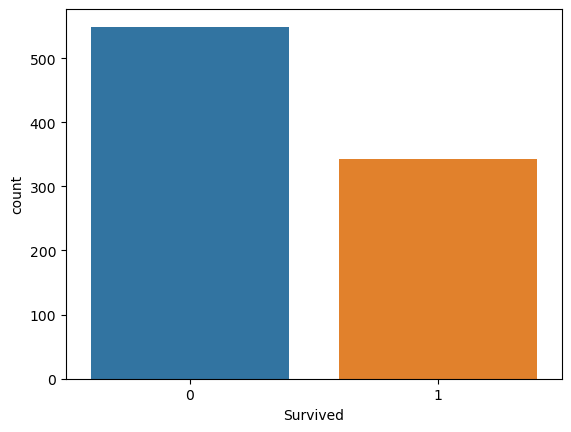

In [24]:
# survived vs. not

sns.countplot(x='Survived', data=titanic_data)
plt.show()

* Most of the passengers are not survived

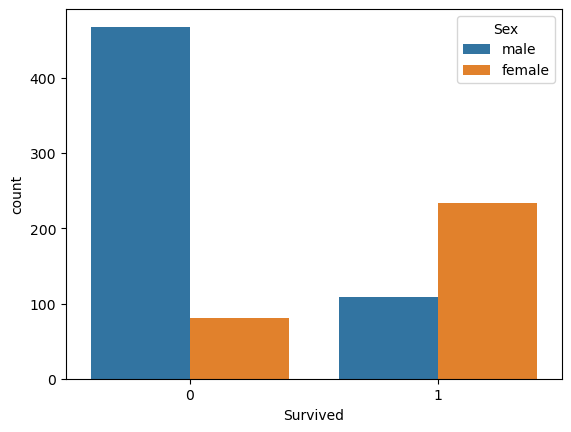

In [25]:
# male vs. female survived

sns.countplot(x='Survived', data=titanic_data, hue='Sex')
plt.show()

* Most of the passengers survived are females

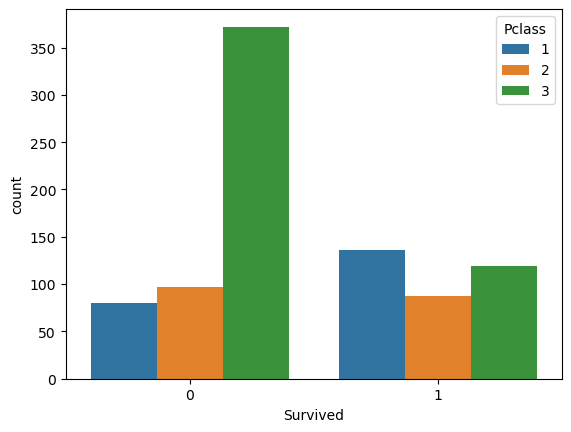

In [26]:
# survival by Pclass

sns.countplot(x='Survived', data=titanic_data, hue='Pclass')
plt.show()

* Most of the deaths are from 3rd lower class

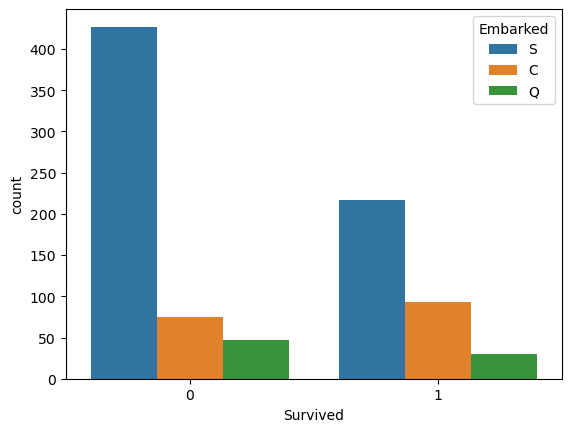

In [27]:
# survival by Embarked

sns.countplot(x='Survived', data=titanic_data, hue='Embarked')
plt.show()

* Most of the death are from Southampton

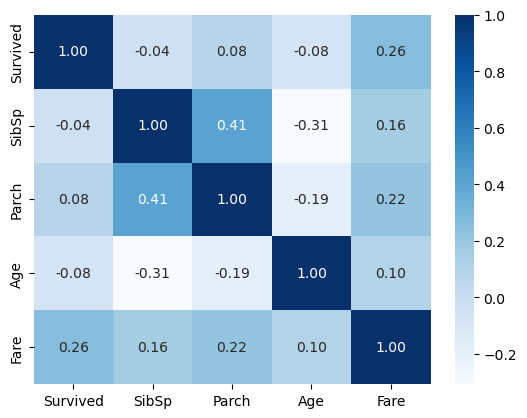

In [28]:
# Numerical variable correlation

sns.heatmap(titanic_data[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

* Fare has the highest correlation with Survived

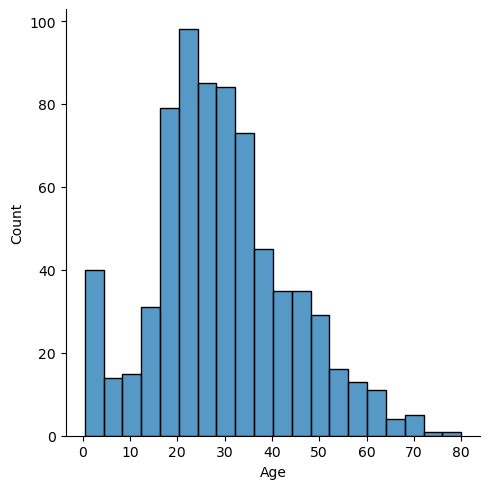

In [29]:
# distribution of Age

sns.displot(x='Age', data=titanic_data)
plt.show()

* Most of the passengers traveled are at Age 15-40

---
#### titanic_data
---

In [30]:
# check null values

In [31]:
titanic_data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

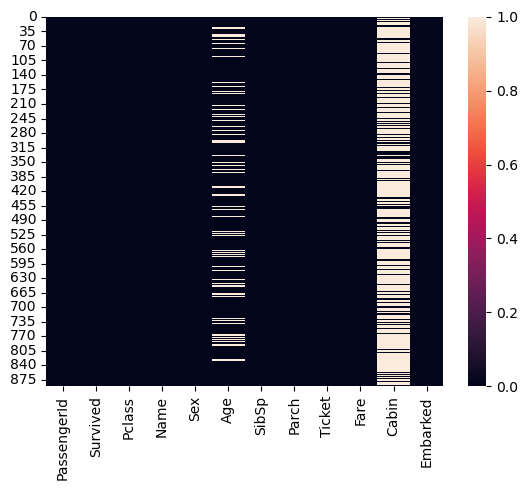

In [32]:
# visualize null values

sns.heatmap(titanic_data.isna())
plt.show()

In [33]:
# % of null values

In [34]:
# Age

(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [35]:
# Cabin

(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

In [36]:
# Embarked

(titanic_data['Embarked'].isna().sum()/len(titanic_data['Embarked']))*100

0.22446689113355783

---
#### test data
---

In [37]:
# check null values

In [38]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

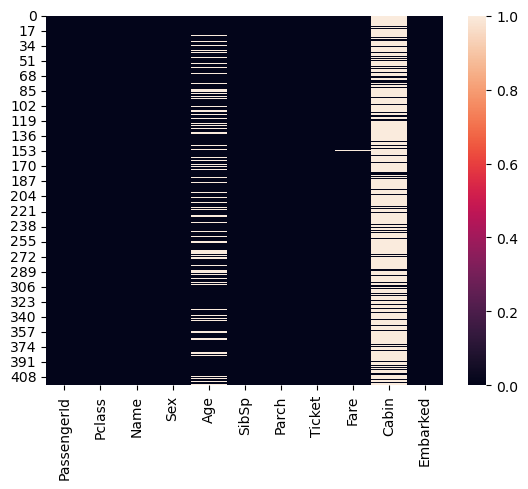

In [39]:
# visualize null values

sns.heatmap(test.isna())
plt.show()

In [40]:
# % of null values

In [41]:
# Age

(test['Age'].isna().sum()/len(test['Age']))*100

20.574162679425836

In [42]:
# Cabin

(test['Cabin'].isna().sum()/len(test['Cabin']))*100

78.22966507177034

In [43]:
# Fare

(test['Fare'].isna().sum()/len(test['Fare']))*100

0.23923444976076555

---
### Data Preprocessing
---

* If % of null > 30% --> drop the column

* If % of null < 30% --> fill null values with mean or mode

---
#### titanic_data
---

In [44]:
# fill missing values 

In [45]:
# fill Age

mean_age = titanic_data['Age'].mean()
titanic_data['Age'].fillna(mean_age, inplace=True)

In [46]:
# verity if there are any null values in Age

titanic_data['Age'].isna().sum()

0

In [47]:
# Fill the Embarked missing values with most frequent value(mode)

mode_embarked = titanic_data['Embarked'].dropna().mode()[0]
titanic_data['Embarked'].fillna(mode_embarked, inplace=True)

In [48]:
# verity if there are any null values in Embarked

titanic_data['Embarked'].isna().sum()

0

In [49]:
# drop Cabin

titanic_data.drop('Cabin', axis=1, inplace=True)

In [50]:
# check whether it droped or not

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
titanic_data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

* Numeric: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
    
* Non-numeric: Name, Sex, Ticket, Embarked


In [53]:
# convert sex into numeric values

In [54]:
# pd.get_dummies(titanic_data['Sex']); because we need only one column drop one

gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [55]:
# add Gender new column to dataframe

titanic_data['Gender'] = gender

In [56]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


* So, Gender value 1 -> male and 0 -> female

In [57]:
# drop columns which are not much usefull

In [58]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


---
#### test data
---

In [60]:
# fill missing values 

In [61]:
# fill Age

mean_ageT = test['Age'].mean()
test['Age'].fillna(mean_ageT, inplace=True)

In [62]:
# verity if there are any null values in Age

test['Age'].isna().sum()

0

In [63]:
# fill Fare

mean_fareT = test['Fare'].mean()
test['Fare'].fillna(mean_fareT, inplace=True)

In [64]:
# verity if there are any null values in Age

test['Fare'].isna().sum()

0

In [65]:
# drop Cabin

test.drop('Cabin', axis=1, inplace=True)

In [66]:
# check whether it droped or not

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [67]:
test.isna().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
# convert sex into numeric values

In [69]:
genderT = pd.get_dummies(test['Sex'], drop_first=True)

In [70]:
# add Gender new column to dataframe

test['Gender'] = genderT

In [71]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [72]:
# drop columns which are not much usefull

In [73]:
test.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [74]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


---
#### Split data
---

In [75]:
train = titanic_data.drop('PassengerId', axis=1)

In [76]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [77]:
# split

In [78]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId', axis = 1).copy()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (891, 6)
y_train shape:  (891,)
x_test shape:  (418, 6)


---
### Model
---

In [79]:
# import SVC

In [93]:
from sklearn.svm import SVC

In [94]:
svm = SVC(kernel='rbf', C=100 , random_state=1)

In [95]:
# train model

svm.fit(x_train, y_train)

SVC(C=100, random_state=1)

In [84]:
# prediction

In [96]:
predict = svm.predict(x_test)

In [86]:
# test the performance

In [97]:
# accuracy

acc_svm = round(svm.score(x_train, y_train) * 100, 2)
acc_svm

80.92

---
### Prepare Submission Data
---

In [98]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
sample_submission.shape

(418, 2)

In [100]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict})
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [101]:
submit.shape

(418, 2)

In [102]:
# Create and save csv file 

submit.to_csv("submission.csv", index = False)